In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./user_activity_raw2.csv')
df.head()

/Users/ctoon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,request,user_id,created_at,document_id,id,q,alert_for,alert_type,comment,date,doc_type,text
0,documents#upload,2,5/22/18 15:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,documents#upload,2,5/22/18 11:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,documents#upload,2,5/22/18 9:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,documents#upload,2,5/22/18 9:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,documents#upload,2,5/22/18 9:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

In [2]:
# DF for users and request, request being the API request of an action
activity = df.iloc[:,0:2]
activity.head()

,request,user_id
0,documents#upload,2
1,documents#upload,2
2,documents#upload,2
3,documents#upload,2
4,documents#upload,2


In [3]:
# Encode request request column
encoded_request = pd.get_dummies(activity['request'], drop_first=True).reset_index(drop=True)
encoded_request.head()

,analytics#searches_per_day,analytics#users_per_day,analytics#visitors_per_day,benchling#open,benchling#show,benchling_analytics#modified_entries_per_user,benchling_entries#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,...,subscriptions#index,subscriptions#update,users#disable_recommendation_email,users#hide_journey_item,users#index,users#journey,users#my_journey,users#open_cv,users#toggle_recommendation_email,users#uploads
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
merged = pd.concat([activity.reset_index(drop=True), encoded_request], axis=1)
merged.head()

,request,user_id,analytics#searches_per_day,analytics#users_per_day,analytics#visitors_per_day,benchling#open,benchling#show,benchling_analytics#modified_entries_per_user,benchling_entries#show,clinical_trials#more_like_this,...,subscriptions#index,subscriptions#update,users#disable_recommendation_email,users#hide_journey_item,users#index,users#journey,users#my_journey,users#open_cv,users#toggle_recommendation_email,users#uploads
0,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
merged['user_id'].unique()

array([  2,   3,   7,   8,   9,  10,  13,  14,  15,  16,  17,  18,  20,
        21,  23,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  55,  56,  57,  58,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  80,  81,  82,  83,  84,  85,  86,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       162, 163, 164, 166, 167, 168, 170, 171, 172, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 20

In [6]:
merged.columns[2:]

Index(['analytics#searches_per_day', 'analytics#users_per_day',
       'analytics#visitors_per_day', 'benchling#open', 'benchling#show',
       'benchling_analytics#modified_entries_per_user',
       'benchling_entries#show', 'clinical_trials#more_like_this',
       'clinical_trials#open', 'clinical_trials#show',
       ...
       'subscriptions#index', 'subscriptions#update',
       'users#disable_recommendation_email', 'users#hide_journey_item',
       'users#index', 'users#journey', 'users#my_journey', 'users#open_cv',
       'users#toggle_recommendation_email', 'users#uploads'],
      dtype='object', length=114)

In [21]:
totals = []
for user_id in merged['user_id'].unique():
    user_totals = [user_id]
    new_df = merged[merged['user_id'] == user_id]
    for col in merged.columns[2:]:
        user_totals.append(new_df[col].sum())
    totals.append(user_totals)
results_df = pd.DataFrame(totals, columns=merged.columns[1:])
results_df.head()

,user_id,analytics#searches_per_day,analytics#users_per_day,analytics#visitors_per_day,benchling#open,benchling#show,benchling_analytics#modified_entries_per_user,benchling_entries#show,clinical_trials#more_like_this,clinical_trials#open,...,subscriptions#index,subscriptions#update,users#disable_recommendation_email,users#hide_journey_item,users#index,users#journey,users#my_journey,users#open_cv,users#toggle_recommendation_email,users#uploads
0,2,30,30,10,1,0,0,0,0,0,...,116,2,0,0,74,0,61,1,0,6
1,3,146,146,146,6,0,0,0,0,1,...,3,1,0,1,131,0,183,0,0,34
2,7,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8,1,1,1,0,0,0,0,0,0,...,3,0,0,0,1,0,1,0,0,8
4,9,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
# Elbow plot for intertias
def show_elbow_plot(df_to_plot):
    inertias = []

    for i in range(1,9):
        km = KMeans(n_clusters = i, algorithm = "auto")
        km.fit(df_to_plot)
        inertias.append(round(km.inertia_, 2))
    inertias

    n_clust = range(1,9)

    plt.scatter(n_clust, inertias, color = "green")
    plt.plot(n_clust, inertias, color = "purple")
    #Plot Labels
    plt.title("Elbow plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia Value")
    plt.show()

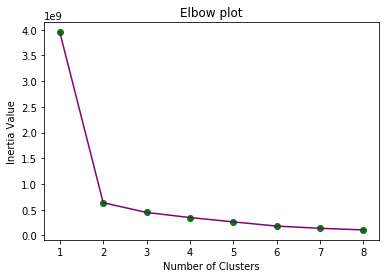

In [25]:
show_elbow_plot(results_df.iloc[:,1:])

In [37]:
summed_requests_km = KMeans(n_clusters = 3, algorithm = "auto")
summed_requests_km.fit(results_df.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
predictions = summed_requests_km.predict(results_df.iloc[:,1:])
print(predictions)

[2 0 1 1 0 2 0 0 0 1 1 1 1 0 0 0 2 0 0 0 0 0 2 2 2 1 1 0 0 0 0 0 1 2 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 0 0 1 2 1 0 0 2 0 0 0 1 0 1 1
 1 2 1 0 2 1 1 0 0 0 2 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 2 0 1 1 1 0 0
 0 1 1 1 0 0 0 0 2 1 0 0 1 2 1 1 2 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 1 0 1 2 0 1 0 2 0 1 2 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 1 0 2 0 0 1 0 0 0 0 0]


In [39]:
clusters_df = pd.DataFrame({ 'user_id': results_df['user_id'].values, 'cluster': predictions })
clusters_df.head()

,cluster,user_id
0,2,2
1,0,3
2,1,7
3,1,8
4,0,9


In [49]:
cluster0 = clusters_df[clusters_df['cluster'] == 0]
cluster1 = clusters_df[clusters_df['cluster'] == 1]
cluster2 = clusters_df[clusters_df['cluster'] == 2]

print(len(cluster0))
print(len(cluster1))
print(len(cluster2))

113
71
28


In [50]:
cluster0 = results_df.iloc[cluster0.index].copy()
cluster1 = results_df.iloc[cluster1.index].copy()
cluster2 = results_df.iloc[cluster2.index].copy()

display(cluster0.head(10))
display(cluster1.head(10))
display(cluster2.head(10))

,user_id,analytics#searches_per_day,analytics#users_per_day,analytics#visitors_per_day,benchling#open,benchling#show,benchling_analytics#modified_entries_per_user,benchling_entries#show,clinical_trials#more_like_this,clinical_trials#open,...,subscriptions#index,subscriptions#update,users#disable_recommendation_email,users#hide_journey_item,users#index,users#journey,users#my_journey,users#open_cv,users#toggle_recommendation_email,users#uploads
1,3,146,146,146,6,0,0,0,0,1,...,3,1,0,1,131,0,183,0,0,34
4,9,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,7,7,0,0,0,0,0,0,0,...,2,0,0,0,59,0,2,0,0,0
7,14,49,49,49,0,0,0,0,0,0,...,6,0,0,0,530,15,59,0,2,2
8,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,21,14,14,0,0,0,0,0,0,0,...,2,0,0,0,1,0,5,0,0,0
14,23,7,7,7,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
15,25,52,52,47,12,0,0,0,0,0,...,17,0,0,0,106,0,90,3,0,1
17,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,analytics#searches_per_day,analytics#users_per_day,analytics#visitors_per_day,benchling#open,benchling#show,benchling_analytics#modified_entries_per_user,benchling_entries#show,clinical_trials#more_like_this,clinical_trials#open,...,subscriptions#index,subscriptions#update,users#disable_recommendation_email,users#hide_journey_item,users#index,users#journey,users#my_journey,users#open_cv,users#toggle_recommendation_email,users#uploads
2,7,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8,1,1,1,0,0,0,0,0,0,...,3,0,0,0,1,0,1,0,0,8
9,16,1,1,0,0,0,0,0,0,0,...,3,0,0,0,4,0,11,0,0,18
10,17,5,5,0,4,0,0,0,0,0,...,17,0,0,0,14,0,8,0,0,6
11,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0
12,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,36
25,35,10,10,0,1,0,0,0,0,0,...,4,0,0,3,19,0,34,6,0,14
26,36,1,1,0,0,0,0,0,0,0,...,7,0,0,0,8,0,1,1,0,5
32,42,0,0,0,0,0,0,0,0,0,...,4,0,0,0,4,0,0,1,0,0
34,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,5


,user_id,analytics#searches_per_day,analytics#users_per_day,analytics#visitors_per_day,benchling#open,benchling#show,benchling_analytics#modified_entries_per_user,benchling_entries#show,clinical_trials#more_like_this,clinical_trials#open,...,subscriptions#index,subscriptions#update,users#disable_recommendation_email,users#hide_journey_item,users#index,users#journey,users#my_journey,users#open_cv,users#toggle_recommendation_email,users#uploads
0,2,30,30,10,1,0,0,0,0,0,...,116,2,0,0,74,0,61,1,0,6
5,10,5,5,0,5,0,0,0,0,0,...,65,0,0,0,74,0,13,1,0,59
16,26,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
22,32,7,7,0,12,0,0,0,0,0,...,48,0,0,0,37,0,10,3,3,11
23,33,8,8,0,3,0,0,0,0,0,...,95,0,0,0,58,0,16,0,2,0
24,34,1,1,0,3,0,0,0,0,0,...,8,0,0,0,12,0,1,0,0,0
33,43,0,0,0,1,0,0,0,0,0,...,2,0,0,0,54,0,0,4,0,0
51,64,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
53,66,3,3,1,3,0,0,0,0,0,...,18,0,0,0,7,0,6,0,0,6
57,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['request'].unique()

In [51]:
calls = ['documents#upload', 'search#storyboards', 'search#benchling', 'search#directory', 'containers#update_annotation', 'containers#annotations',
       'documents#open', 'containers#destroy',
       'documents#more_like_this', 'containers#create', 'documents#show', 'enrichments#create', 'containers#add_permissions',
       'containers#remove_permissions', 'containers#associate', 'containers#delete_asset', 'subscriptions#create',
       'subscriptions#destroy', 'subscriptions#update', 'feedly#open',
       'likes#toggle', 'containers#update_position', 'shares#create',
       'benchling#open', 'clinical_trials#show', 'pubmed_articles#show',
       'comments#create', 'containers#update', 'containers#bulk_associate_and_create_container', 'search#fasta',
       'clinical_trials#open', 'containers#set_primary_asset', 'feedly#show',
       'storyboards#show', 'storyboards#assets',
       'storyboards#annotations', 'storyboards#add_permissions',
       'storyboards#update_annotation', 'storyboards#remove_asset',
       'storyboards#update', 'storyboards#create', 'search#clinical_trials', 'search#motifs', 'search#pubmed',
       'sequence_rollups#alleles_table', 'search#feedly_items', 'sequence_rollups#show', 'pubmed_articles#open', 'search#benchling_v2',
       'clinical_trials#more_like_this', 'benchling#show', 'documents#share', 'storyboards#destroy',
       'sequences#open']

In [66]:
df_filtered = df[df['request'].isin(calls)]
df_filtered = df_filtered[['request', 'user_id']]
df_filtered.head()

,request,user_id
0,documents#upload,2
1,documents#upload,2
2,documents#upload,2
3,documents#upload,2
4,documents#upload,2


In [68]:
requests_df2 = df.iloc[:,0]
requests_df2 = pd.get_dummies(df_filtered['request'])
merged2 = pd.concat([df_filtered, requests_df2], axis=1)
merged2.head()

,request,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
0,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,documents#upload,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
merged2['user_id'].unique()
merged2.columns[2:]

Index(['benchling#open', 'benchling#show', 'clinical_trials#more_like_this',
       'clinical_trials#open', 'clinical_trials#show', 'comments#create',
       'containers#add_permissions', 'containers#annotations',
       'containers#associate',
       'containers#bulk_associate_and_create_container', 'containers#create',
       'containers#delete_asset', 'containers#destroy',
       'containers#remove_permissions', 'containers#set_primary_asset',
       'containers#update', 'containers#update_annotation',
       'containers#update_position', 'documents#more_like_this',
       'documents#open', 'documents#share', 'documents#show',
       'documents#upload', 'enrichments#create', 'feedly#open', 'feedly#show',
       'likes#toggle', 'pubmed_articles#open', 'pubmed_articles#show',
       'search#benchling', 'search#benchling_v2', 'search#clinical_trials',
       'search#directory', 'search#fasta', 'search#feedly_items',
       'search#motifs', 'search#pubmed', 'search#storyboards',
       

In [74]:
totals2 = []
for user_id in merged2['user_id'].unique():
    user_totals = [user_id]
    new_df2 = merged2[merged2['user_id'] == user_id]
    for col in merged2.columns[2:]:
        user_totals.append(new_df2[col].sum())
    totals2.append(user_totals)
results_df2 = pd.DataFrame(totals2, columns=merged2.columns[1:])
results_df2.head()

,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,containers#associate,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
0,2,1,0,0,0,2,0,9,17,2,...,0,0,0,0,0,0,0,4,1,2
1,3,6,0,0,1,6,9,12,51,35,...,0,0,0,0,0,0,0,7,0,1
2,7,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


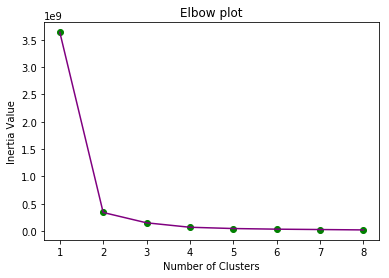

In [75]:
show_elbow_plot(results_df2.iloc[:,1:])

In [95]:
summed_requests_km2 = KMeans(n_clusters = 5, algorithm = "auto")
summed_requests_km2.fit(results_df2.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
predictions2 = summed_requests_km2.predict(results_df2.iloc[:,1:])
print(predictions2)

[2 4 1 1 0 2 0 0 0 1 1 1 1 0 0 0 2 0 0 0 0 0 4 4 2 3 1 0 0 0 4 0 1 2 1 1 0
 0 1 1 0 1 0 1 1 3 1 1 1 1 1 2 1 4 1 1 1 2 3 0 0 1 2 1 0 0 3 0 0 1 0 1 3 3
 4 1 0 4 1 1 0 0 0 4 1 1 0 0 0 4 0 0 4 0 3 4 0 1 1 1 1 1 4 4 4 1 3 1 0 0 0
 1 1 1 4 0 0 0 4 1 0 0 1 4 1 1 2 0 4 3 1 1 1 0 0 3 1 4 0 1 0 0 0 0 0 1 1 4
 1 0 1 2 0 3 4 2 0 1 2 4 0 0 0 4 0 0 0 0 0 4 4 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 4 0 0 0 1 0 0 0 2 0 0 4 0 0 3 0 2 0 4 1 0 0 0 0 0]


In [97]:
clusters_df2 = pd.DataFrame({ 'user_id': results_df2['user_id'].values, 'cluster': predictions2 })
clusters_df2.head()

,cluster,user_id
0,2,2
1,4,3
2,1,7
3,1,8
4,0,9


In [101]:
cluster0_2 = clusters_df2[clusters_df2['cluster'] == 0]
cluster1_2 = clusters_df2[clusters_df2['cluster'] == 1]
cluster2_2 = clusters_df2[clusters_df2['cluster'] == 2]
cluster3_2 = clusters_df2[clusters_df2['cluster'] == 3]
cluster4_2 = clusters_df2[clusters_df2['cluster'] == 4]

print(len(cluster0_2))
print(len(cluster1_2))
print(len(cluster2_2))
print(len(cluster3_2))
print(len(cluster4_2))

cluster0_2 = results_df2.iloc[cluster0_2.index].copy()
cluster1_2 = results_df2.iloc[cluster1_2.index].copy()
cluster2_2 = results_df2.iloc[cluster2_2.index].copy()
cluster3_2 = results_df2.iloc[cluster3_2.index].copy()
cluster4_2 = results_df2.iloc[cluster4_2.index].copy()

display(cluster0_2.head(10))
display(cluster1_2.head(10))
display(cluster2_2.head(10))
display(cluster3_2.head(10))
display(cluster4_2.head(10))

97
60
14
12
28


,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,containers#associate,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0
7,14,0,0,0,0,0,0,3,10,16,...,0,0,0,0,0,0,0,0,0,0
8,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,25,12,0,0,0,0,0,9,5,10,...,0,0,0,0,0,0,0,0,0,0
17,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,containers#associate,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
2,7,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,17,4,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
11,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,36,0,0,0,0,1,0,0,0,0,...,0,0,0,0,7,0,0,1,0,0
32,42,0,0,0,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,44,0,0,0,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,containers#associate,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
0,2,1,0,0,0,2,0,9,17,2,...,0,0,0,0,0,0,0,4,1,2
5,10,5,0,0,0,1,1,3,7,0,...,110,2,0,18,137,4,2,3,15,0
16,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,34,3,0,0,0,0,0,1,17,1,...,1,0,0,0,13,0,0,0,0,0
33,43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
51,64,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,75,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,containers#associate,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
25,35,1,0,0,0,0,0,0,0,0,...,3,1,0,2,37,0,12,0,0,0
45,57,1,0,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,4,1,0
58,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,89,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,145,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,151,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


,user_id,benchling#open,benchling#show,clinical_trials#more_like_this,clinical_trials#open,clinical_trials#show,comments#create,containers#add_permissions,containers#annotations,containers#associate,...,storyboards#assets,storyboards#create,storyboards#destroy,storyboards#remove_asset,storyboards#show,storyboards#update,storyboards#update_annotation,subscriptions#create,subscriptions#destroy,subscriptions#update
1,3,6,0,0,1,6,9,12,51,35,...,0,0,0,0,0,0,0,7,0,1
22,32,12,0,0,0,0,2,1,3,0,...,0,0,0,0,0,0,0,4,0,0
23,33,3,0,0,0,0,2,2,6,0,...,0,0,0,0,1,0,0,0,18,0
30,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,66,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,2,0
74,90,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
77,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,108,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
print('Cluster 0 ({}):'.format(len(cluster0_2)), cluster0_2['user_id'].unique(), '\n')
print('Cluster 1 ({}):'.format(len(cluster1_2)), cluster1_2['user_id'].unique(), '\n')
print('Cluster 2 ({}):'.format(len(cluster2_2)), cluster2_2['user_id'].unique(), '\n')
print('Cluster 3 ({}):'.format(len(cluster3_2)), cluster3_2['user_id'].unique(), '\n')
print('Cluster 4 ({}):'.format(len(cluster4_2)), cluster4_2['user_id'].unique(), '\n')

Cluster 0 (97): [  9  13  14  15  21  23  25  27  28  29  30  31  37  38  39  41  46  47
  50  52  72  73  77  78  81  83  85  92  96  97  98 102 103 104 106 107
 109 112 124 125 126 131 132 133 136 137 143 149 150 154 156 157 162 163
 164 171 175 179 183 184 185 187 188 189 190 191 194 196 197 198 199 201
 202 203 204 205 206 207 208 209 211 212 213 215 216 217 219 220 222 223
 225 227 230 231 233 234 235] 

Cluster 1 (60): [  7   8  16  17  18  20  36  42  44  45  48  49  51  55  56  58  59  60
  61  63  65  67  68  69  74  76  84  86  91  94  95 100 101 113 114 115
 116 117 121 123 127 128 129 135 138 140 141 146 147 148 152 155 166 167
 170 172 180 200 214 229] 

Cluster 2 (14): [  2  10  26  34  43  64  70  75 142 174 178 181 218 226] 

Cluster 3 (12): [ 35  57  71  80  88  89 110 122 145 151 176 224] 

Cluster 4 (28): [  3  32  33  40  66  90  93  99 105 108 111 118 119 120 130 134 139 144
 153 168 177 182 186 192 193 210 221 228] 

